In [1]:
!pip install tensorflow

     |████████████████████████████████| 20.6 MB 78 kB/s  eta 0:00:01
     |████████████████████████████████| 152 kB 74.8 MB/s eta 0:00:01
ERROR: pandas-ml 0.6.1 requires enum34, which is not installed.
ERROR: fbprophet 0.7.1 requires cmdstanpy==0.9.5, which is not installed.
ERROR: torchvision 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.12.0 which is incompatible.
ERROR: tifffile 2022.10.10 has requirement numpy>=1.19.2, but you'll have numpy 1.18.5 which is incompatible.
ERROR: responsibleai 0.23.0 has requirement ipykernel<=6.6.0, but you'll have ipykernel 6.8.0 which is incompatible.
ERROR: responsibleai 0.23.0 has requirement markupsafe<2.1.0, but you'll have markupsafe 2.1.2 which is incompatible.
ERROR: responsibleai 0.23.0 has requirement numba<0.54.0, but you'll have numba 0.55.2 which is incompatible.
ERROR: ray 2.0.0 has requirement click<=8.0.4,>=7.0, but you'll have click 8.1.3 which is incompatible.
ERROR: ray 2.0.0 has requirement grpcio<=1.43.0,>=1.28.1; 

In [2]:
import os
import zipfile

In [3]:
# # uncomment if the dataset is not loaded
# # name of the zip file you want to unzip
# local_zip = 'image-processing.zip'
# # opening a file with mode parameter 'r' : read existing file
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# # extract all contents of the zip file
# zip_ref.extractall('')
# # close the file
# zip_ref.close()


In [4]:
!pip install seaborn

In [5]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import backend, models, layers, optimizers, regularizers, metrics
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import plot_model


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from PIL import Image

import shutil

np.random.seed(0)
tf.random.set_seed(0)


In [6]:
import os
os.listdir()

['.amlignore',
 '.amlignore.amltmp',
 '.ipynb_aml_checkpoints',
 'image-processing.zip',
 'ImageProcessing.ipynb',
 'imageprocessing.ipynb.amltmp',
 'test-20230326T155708Z-001',
 'train-20230326T152931Z-001',
 'val-20230326T152503Z-001']

In [7]:
test_path="test-20230326T155708Z-001/test"
train_path="train-20230326T152931Z-001/train"
val_path="val-20230326T152503Z-001/val"

In [8]:
import cv2
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(299,299))

        x_train.append(img_arr)

In [9]:
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(299,299))

        x_test.append(img_arr)


In [10]:
x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(299,299))

        x_val.append(img_arr)


In [11]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0
print("done")

done


In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'sparse')
print("done")

Found 9971 images belonging to 6 classes.
Found 1966 images belonging to 6 classes.
Found 1962 images belonging to 6 classes.
done


In [13]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes
print(train_y,test_y,val_y)

[0 0 0 ... 5 5 5] [0 0 0 ... 5 5 5] [0 0 0 ... 5 5 5]


In [14]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((9971,), (1966,), (1962,))

In [15]:
IMAGE_SIZE  = (299, 299,3)

In [17]:
base_model = InceptionV3( weights='imagenet', include_top=False) #creating the base model

2023-04-03 15:37:47.094331: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-04-03 15:37:47.125394: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla M60 computeCapability: 5.2
coreClock: 1.1775GHz coreCount: 16 deviceMemorySize: 7.94GiB deviceMemoryBandwidth: 149.31GiB/s
2023-04-03 15:37:47.125701: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-04-03 15:37:47.127835: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-04-03 15:37:47.129595: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-04-03 15:37:47.129890: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-0

In [18]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(6, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False
print("Successful")

Successful


In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [23]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [21]:
import gc
del x_train,x_test,x_val
gc.collect()
del training_set,test_set,val_set
gc.collect()

0

In [34]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=20,
  #callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/20
312/312 [==============================] - 88s 281ms/step - loss: 0.1642 - accuracy: 0.9403 - val_loss: 0.3371 - val_accuracy: 0.8874
Epoch 2/20
312/312 [==============================] - 64s 206ms/step - loss: 0.1558 - accuracy: 0.9465 - val_loss: 0.3147 - val_accuracy: 0.8909
Epoch 3/20
312/312 [==============================] - 66s 210ms/step - loss: 0.1373 - accuracy: 0.9509 - val_loss: 0.2808 - val_accuracy: 0.9154
Epoch 4/20
312/312 [==============================] - 65s 209ms/step - loss: 0.1155 - accuracy: 0.9575 - val_loss: 0.2818 - val_accuracy: 0.9144
Epoch 5/20
312/312 [==============================] - 66s 210ms/step - loss: 0.1115 - accuracy: 0.9600 - val_loss: 0.4090 - val_accuracy: 0.8654
Epoch 6/20
312/312 [==============================] - 64s 206ms/step - loss: 0.1151 - accu

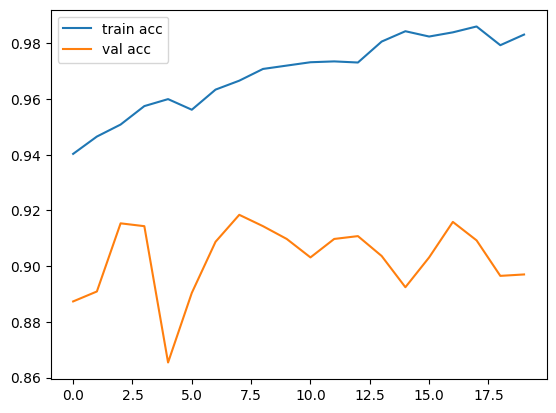

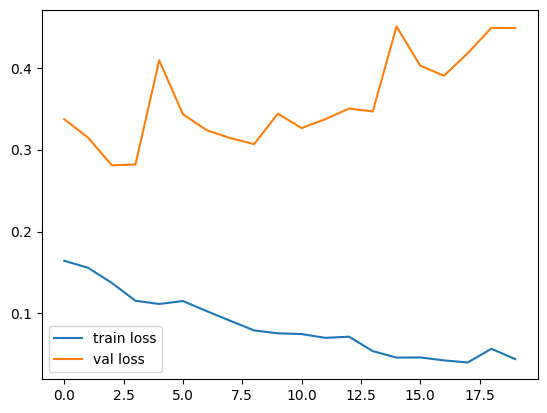

In [35]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('inception_acc.png')

plt.show()
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('inception_loss.png')
plt.show()

In [36]:
model.evaluate(test_x,test_y,batch_size=32)

62/62 [==============================] - 10s 165ms/step - loss: 0.4793 - accuracy: 0.9028


[0.4792729318141937, 0.9028484225273132]

In [27]:
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(classification_report(y_pred,test_y))
#get confusion matrix
cm = confusion_matrix(y_pred,test_y)
print(cm)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       285
           1       0.90      0.90      0.90       153
           2       0.90      0.84      0.87       729
           3       0.95      0.88      0.91       519
           4       0.66      0.90      0.76       216
           5       0.90      0.98      0.94        64

    accuracy                           0.89      1966
   macro avg       0.88      0.91      0.89      1966
weighted avg       0.90      0.89      0.89      1966

[[278   6   1   0   0   0]
 [  0 137   4   1   9   2]
 [  0   6 616  21  82   4]
 [  0   2  48 457  11   1]
 [  0   2  16   4 194   0]
 [  1   0   0   0   0  63]]


In [30]:
import pandas as pd
cm = pd.DataFrame(cm , index = ['0','1','2','3','4','5'] , columns = ['0','1','2','3','4','5'])

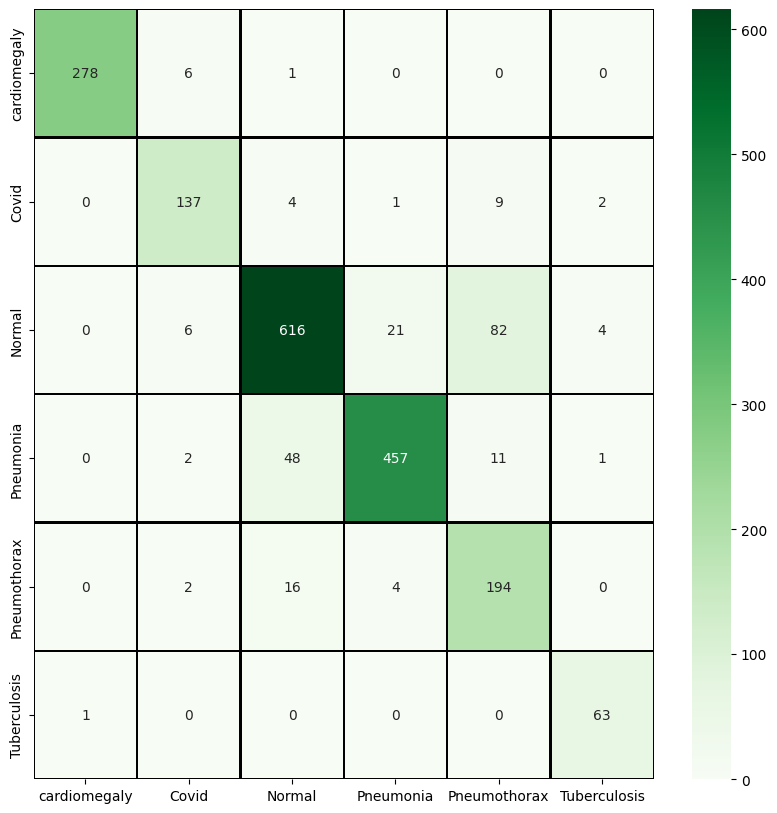

In [33]:
import seaborn as sns
labels = ['cardiomegaly','Covid','Normal','Pneumonia','Pneumothorax','Tuberculosis']
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Greens", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)